# A Visual History of Nobel Prize Winners

#The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src="https://upload.wikimedia.org/wikipedia/en/e/ed/Nobel_Prize.png" width="290" title="Nobel Prize Medal" alt="Nobel Prize Medal">

The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?

Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.

In [3]:
import pandas as pd
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 800)

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.style.use('ggplot')
%matplotlib inline

# Loading the Dataset 

In [10]:
nobel_df=pd.read_csv("nobel.csv")

In [11]:
print("++++++++++The dataset has been loaded++++++++++")

++++++++++The dataset has been loaded++++++++++


In [12]:
nobel_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [13]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [14]:
nobel_df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [15]:
#Checking to see if there are nulls in the dataset
nobel_df.isnull().any()

year                    False
category                False
prize                   False
motivation               True
prize_share             False
laureate_id             False
laureate_type           False
full_name               False
birth_date               True
birth_city               True
birth_country            True
sex                      True
organization_name        True
organization_city        True
organization_country     True
death_date               True
death_city               True
death_country            True
dtype: bool

In [18]:
nobel_df['birth_date'].value_counts()

birth_date
1843-05-21    2
1918-06-18    2
1867-11-07    2
1940-01-04    2
1930-10-10    2
             ..
1925-05-23    1
1910-02-10    1
1904-07-28    1
1895-07-08    1
1943-06-22    1
Name: count, Length: 868, dtype: int64

In [20]:
nobel_df['birth_city'].value_counts()

birth_city
New York, NY                        45
Paris                               25
London                              19
Vienna                              14
Chicago, IL                         12
Berlin                              10
Budapest                             8
Brooklyn, NY                         8
Boston, MA                           8
Washington, DC                       7
Munich                               7
Moscow                               7
Stockholm                            6
Hamburg                              6
Prague                               5
Frankfurt-on-the-Main                5
Montreal                             4
Cairo                                4
Amsterdam                            3
Osaka                                3
Halifax                              3
the Hague                            3
Uppsala                              3
Kristiania (Oslo)                    3
Buenos Aires                         3
Adelaide      

In [21]:
nobel_df['death_country'].value_counts()

death_country
United States of America                        203
United Kingdom                                   73
France                                           51
Germany                                          32
Sweden                                           28
Switzerland                                      26
West Germany (Germany)                           23
Italy                                            14
Spain                                            10
Netherlands                                       9
Denmark                                           9
Norway                                            8
Belgium                                           7
Union of Soviet Socialist Republics (Russia)      6
Canada                                            6
Japan                                             6
Austria                                           6
Scotland                                          5
Russia                                            

# Data Exploration

# What  are the Unique Prize Categories

In [22]:
my_unique=pd.Series(data=nobel_df['category'].unique())

In [23]:
my_unique.index +=1
my_unique

1     Chemistry
2    Literature
3      Medicine
4         Peace
5       Physics
6     Economics
dtype: object

(array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

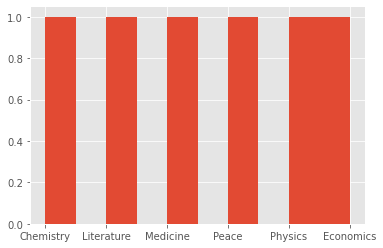

In [24]:
plt.hist(my_unique)

# What are the yearly Nobel Prize Awards

In [33]:
my_year_counts=nobel_df['year'].value_counts().to_frame().rename(columns={'Year':'count'})


In [35]:
max_year=my_year_counts['count'].idxmax()
max_year_count=my_year_counts.at[max_year, 'count']
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print("In the year: {:>6}\nNumber of Awards: {}".format(max_year, max_year_count))



++++++++++++++++++++++++++++++++++++++++++++++++++++++++
In the year:   2001
Number of Awards: 15


# Visualization of the number of Awards Per Year

<BarContainer object of 113 artists>

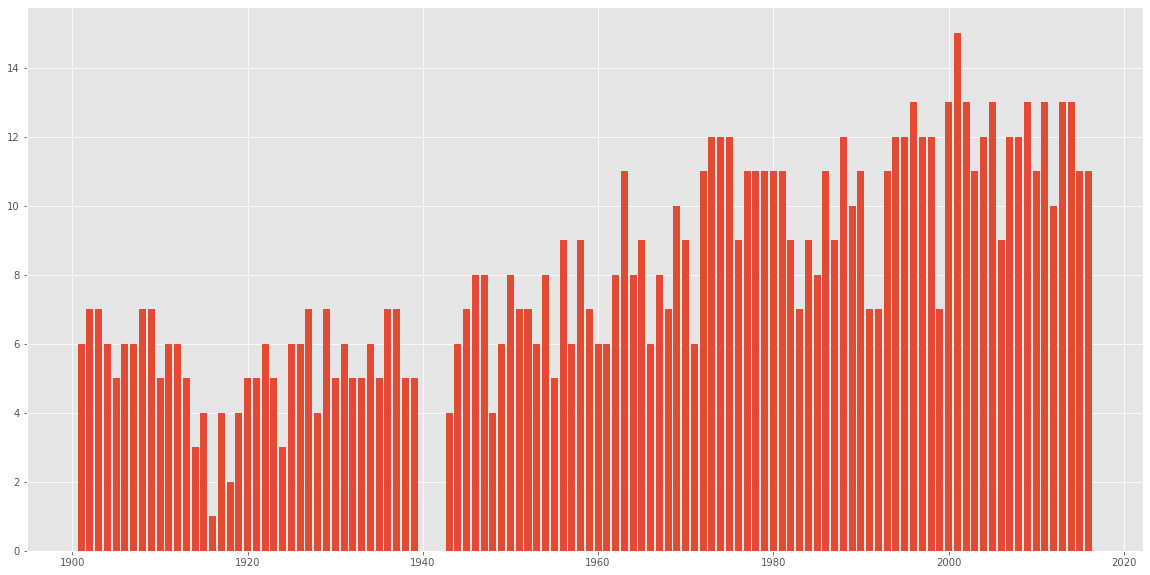

In [51]:
plt.figure(figsize=(20, 10))
plt.bar(my_year_counts.index, my_year_counts['count'])


# Observations from the plot

### From the visualization, it is clear that there is an increasing
### trend in the number of Nobel Prize recipients between the years (1900-2016)
### There is missing bars near the 1940 year mark

In [55]:
#Getting  the Years
years=list(nobel_df['year'])
for year in range(1938, 2022):
    
    if year in years:
        print('{} Nobel Prizes were Award in {}\n '.format(my_year_counts.at[year, 'count'], year))
    else:
        print('No Nobel prize was awarded in {}\n'.format(year))
        

5 Nobel Prizes were Award in 1938
 
5 Nobel Prizes were Award in 1939
 
No Nobel prize was awarded in 1940

No Nobel prize was awarded in 1941

No Nobel prize was awarded in 1942

4 Nobel Prizes were Award in 1943
 
6 Nobel Prizes were Award in 1944
 
7 Nobel Prizes were Award in 1945
 
8 Nobel Prizes were Award in 1946
 
8 Nobel Prizes were Award in 1947
 
4 Nobel Prizes were Award in 1948
 
6 Nobel Prizes were Award in 1949
 
8 Nobel Prizes were Award in 1950
 
7 Nobel Prizes were Award in 1951
 
7 Nobel Prizes were Award in 1952
 
6 Nobel Prizes were Award in 1953
 
8 Nobel Prizes were Award in 1954
 
5 Nobel Prizes were Award in 1955
 
9 Nobel Prizes were Award in 1956
 
6 Nobel Prizes were Award in 1957
 
9 Nobel Prizes were Award in 1958
 
7 Nobel Prizes were Award in 1959
 
6 Nobel Prizes were Award in 1960
 
6 Nobel Prizes were Award in 1961
 
8 Nobel Prizes were Award in 1962
 
11 Nobel Prizes were Award in 1963
 
8 Nobel Prizes were Award in 1964
 
9 Nobel Prizes were Award i

<BarContainer object of 113 artists>

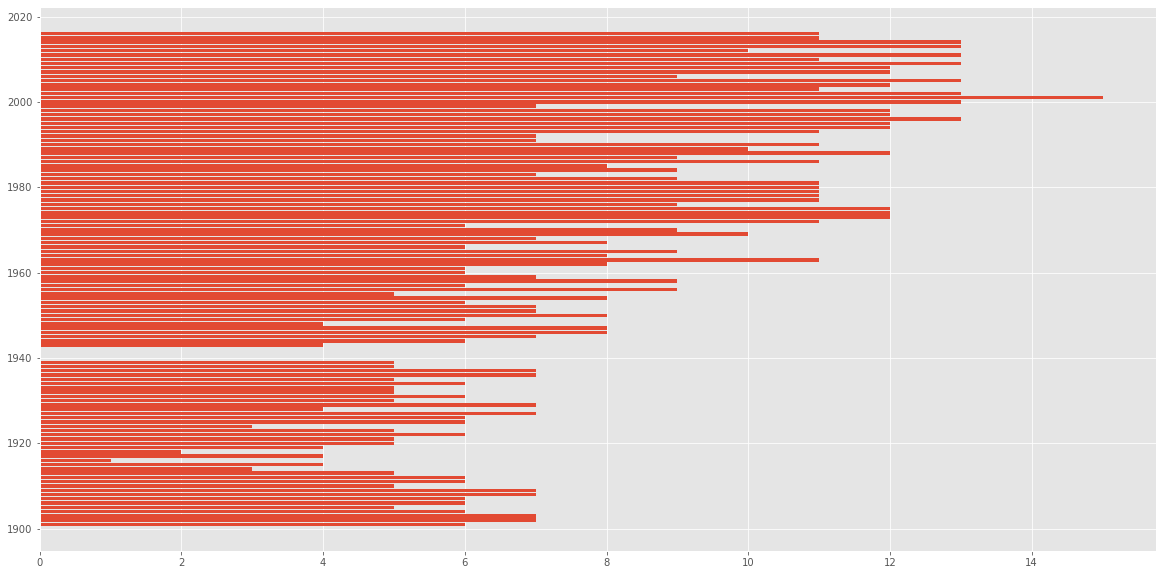

In [52]:
plt.figure(figsize=(20, 10))
plt.barh(my_year_counts.index, my_year_counts['count'])


(array([ 2.,  2., 19., 19., 17., 17.,  3., 25.,  8.,  1.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <a list of 10 Patch objects>)

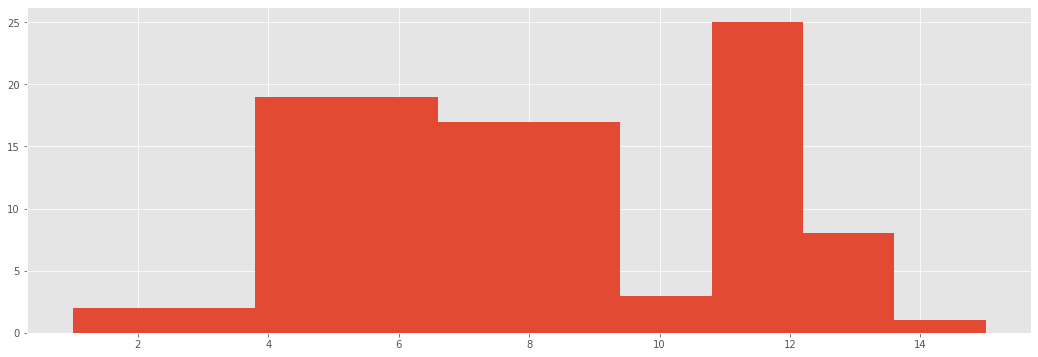

In [50]:
plt.figure(figsize=(18, 6))
plt.hist(my_year_counts['count'])


### How Nobel Prize Recipients
### Individual vs Shared Nobel Prize Recipients

In [56]:
nobel_df['prize_share'].value_counts()

prize_share
1/1    344
1/2    306
1/3    201
1/4     60
Name: count, dtype: int64

# Observations 
- 1/2 : Prize shared among 2
- 1/3 : Prize shared among 3
- 1/4 : Prize shared among 4
- 1/1 : Individual


In [57]:
#Checking the number of shared prizes 
nobel_df['prize_share'].value_counts()

prize_share
1/1    344
1/2    306
1/3    201
1/4     60
Name: count, dtype: int64

In [58]:
#Count of Nobel Prize Winners
len(nobel_df)

911

### The number of Nobel Prizes Won by Gender (Male and Female Reciepints) 

In [59]:
nobel_df['sex'].value_counts()

sex
Male      836
Female     49
Name: count, dtype: int64

### What the Number of Nobel Prize Won by the TOP 15 Nationalities

In [62]:
print('++++++++++++++++++++++++++++++++++++++++++++++++')

print(nobel_df['birth_country'].value_counts()[:15])
print('++++++++++++++++++++++++++++++++++++++++++++++++')


++++++++++++++++++++++++++++++++++++++++++++++++
birth_country
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Switzerland                  16
Austria                      14
Norway                       12
China                        11
Denmark                      11
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++


In [65]:
df=(nobel_df['birth_country'].value_counts()[:15])

In [66]:
df.mean()

42.86666666666667

In [67]:
df.sum()

643

# Observations 

In [ ]:
#USA has the most Nobel Prize winners


In [68]:
nobel_df['USA_born']=nobel_df['birth_country']=='United States of America'
nobel_df['USA_born'].value_counts()

USA_born
False    652
True     259
Name: count, dtype: int64

In [74]:
nobel_df['Germany']=nobel_df['birth_country']=='Germany'
nobel_df['Germany'].value_counts()

Germany
False    850
True      61
Name: count, dtype: int64

In [71]:
germ

Germany
False    850
True      61
Name: count, dtype: int64

In [77]:
nobel_df['decade'] = (np.floor(nobel_df['year']/10)*10).astype(int)
nobel_df['decade'].value_counts()

decade
2000    123
1970    104
1990    104
1980     97
2010     82
1960     79
1950     72
1900     57
1930     56
1920     54
1940     43
1910     40
Name: count, dtype: int64

In [80]:
nobel_df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'USA_born', 'Germany', 'decade'],
      dtype='object')

In [81]:
prop_usa_born_winners = nobel_df.groupby('decade', as_index=False)['USA_born'].mean()
prop_usa_born_winners

,decade,USA_born
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([1.75438596e-02, 2.01015789e+02, 4.02014035e+02, 6.03012281e+02,
        8.04010526e+02, 1.00500877e+03, 1.20600702e+03, 1.40700526e+03,
        1.60800351e+03, 1.80900175e+03, 2.01000000e+03]),
 <a list of 12 Lists of Patches objects>)

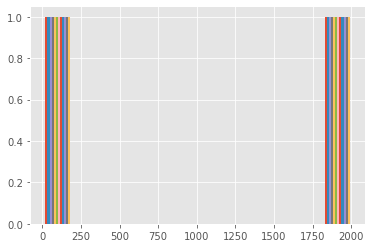

In [85]:
plt.hist(prop_usa_born_winners)

# Visualization of this dominance of USA

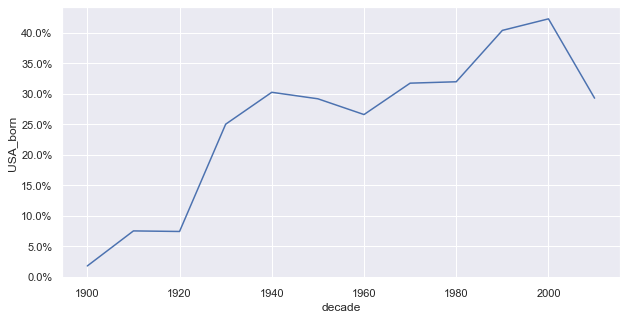

In [86]:
sns.set()
plt.figure(figsize=(10, 5))
my_plot=sns.lineplot(x='decade', y='USA_born', data=prop_usa_born_winners)
my_plot.yaxis.set_major_formatter(PercentFormatter(1.0))


In [88]:
#Proportion of Female laureates per decade
nobel_df['female_recipient']=nobel_df['sex'] == 'Female'
nobel_df['female_recipient'].value_counts()

female_recipient
False    862
True      49
Name: count, dtype: int64

In [89]:
prop_female_recipients = nobel_df.groupby(['decade','category'], as_index=True)['female_recipient'].mean()
prop_female_recipients

decade  category  
1900    Chemistry     0.000000
        Literature    0.100000
        Medicine      0.000000
        Peace         0.071429
        Physics       0.076923
1910    Chemistry     0.125000
        Literature    0.000000
        Medicine      0.000000
        Peace         0.000000
        Physics       0.000000
1920    Chemistry     0.000000
        Literature    0.200000
        Medicine      0.000000
        Peace         0.000000
        Physics       0.000000
1930    Chemistry     0.076923
        Literature    0.111111
        Medicine      0.000000
        Peace         0.111111
        Physics       0.000000
1940    Chemistry     0.000000
        Literature    0.166667
        Medicine      0.071429
        Peace         0.142857
        Physics       0.000000
1950    Chemistry     0.000000
        Literature    0.000000
        Medicine      0.000000
        Peace         0.000000
        Physics       0.000000
1960    Chemistry     0.066667
        Economics   

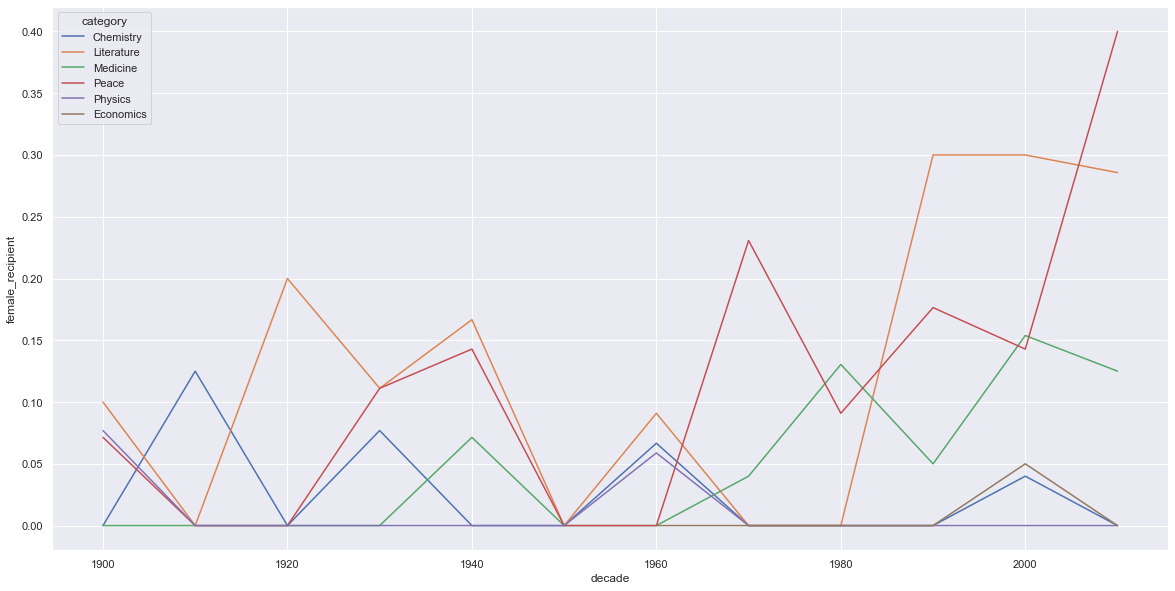

In [93]:
plt.figure(figsize=(20, 10))
my_plot=sns.lineplot(x='decade', y='female_recipient', hue='category', data=prop_female_recipients.reset_index(drop=False))


# Who was the first Woman to Win Nobel Prize

In [94]:
nobel_df['female_recipient'].value_counts()

female_recipient
False    862
True      49
Name: count, dtype: int64

In [95]:
female_recipient=nobel_df[nobel_df['sex'] == 'Female'].nsmallest(1, 'year')


In [96]:
female_recipient

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born,Germany,decade,female_recipient
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,False,1900,True


### Great! The first woman to win the Nobel Prize is Curie, Maria in Physics in 1903

In [97]:
repeats = nobel_df.groupby('full_name', as_index=False).filter(lambda x: len(x)>=2)
repeats

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born,Germany,decade,female_recipient
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,False,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,False,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,False,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,1960,False


### The number of Nobel Laureates who have received the Nobel Prize two or more times

In [98]:
len(repeats)

13

### The number of repeats female Laureates

In [102]:
female_repeats=repeats[repeats['sex'] == 'Female']
print("The number of females who won more than one times is: ", + 
      len(female_repeats))

The number of females who won more than one times is:  2


### What was the age the Receipients when they receive their Prize

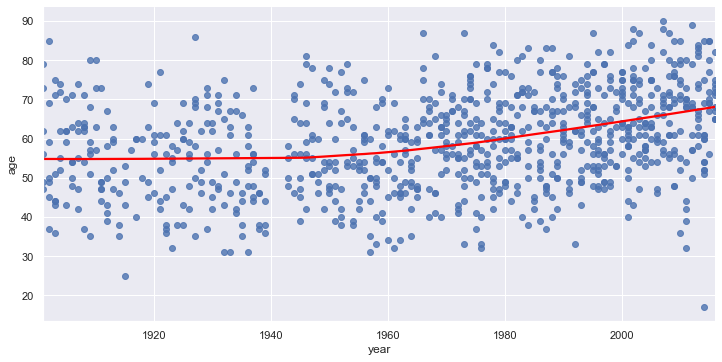

In [105]:
nobel_df['birth_date']=pd.to_datetime(nobel_df['birth_date'])

nobel_df['age'] = nobel_df['year'] - nobel_df['birth_date'].dt.year
sns.lmplot(x='year', y='age', data=nobel_df, lowess=True, aspect=2, line_kws={'color':'red'})


### Looking at age trends within different prize categories.

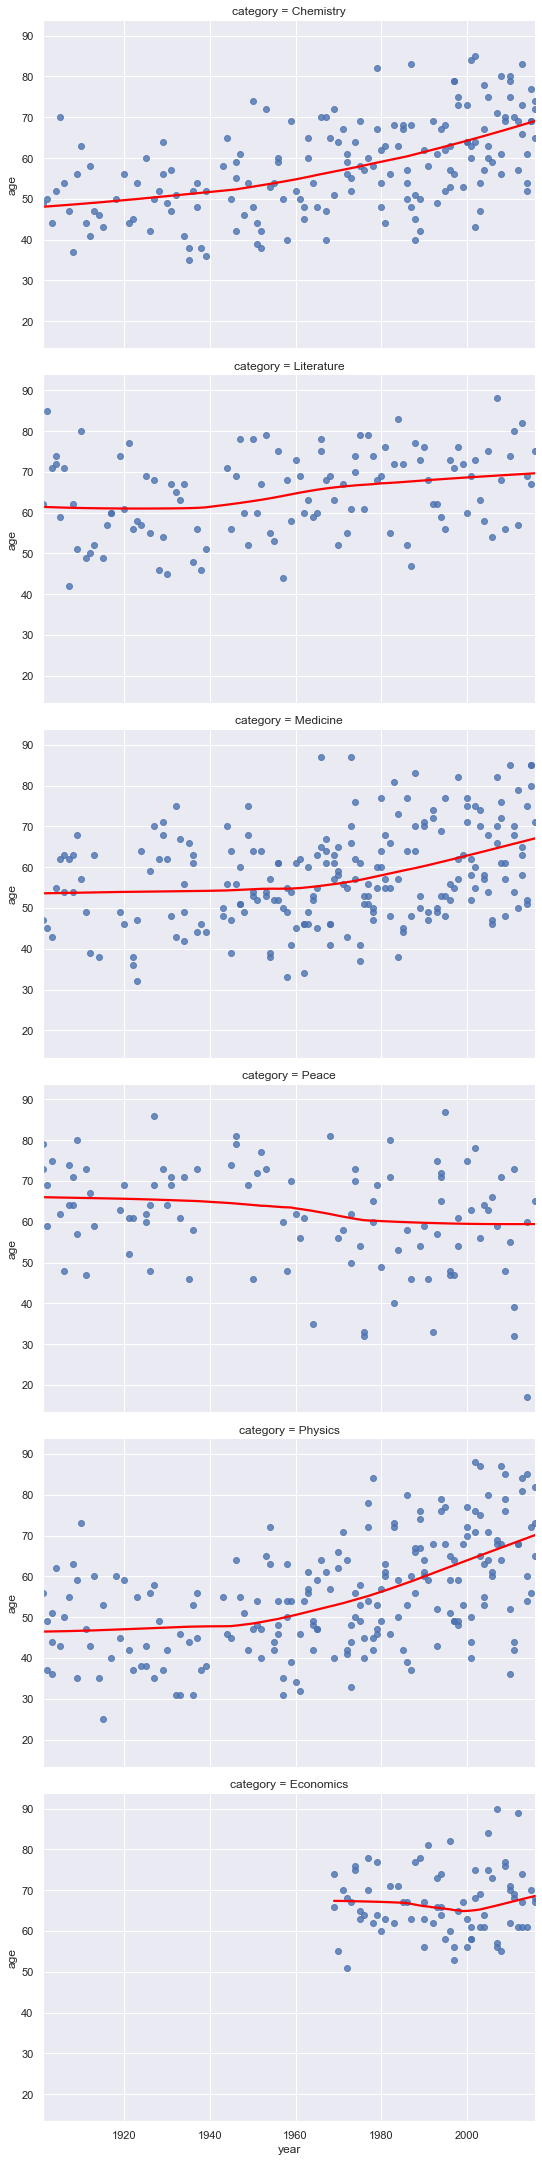

In [108]:
sns.lmplot(x='year', y='age', data=nobel_df, row='category', lowess=True, aspect=1.5, line_kws={'color':'red'})

### Who was oldest to win

In [110]:
nobel_df.nlargest(2, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,USA_born,Germany,decade,female_recipient,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,False,2000,False,90.0
856,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,883,Individual,Lloyd S. Shapley,1923-06-02,"Cambridge, MA",...,"Los Angeles, CA",United States of America,2016-03-12,"Tucson, AZ",United States of America,True,False,2010,False,89.0


### Who was oldest to win

In [111]:
nobel_df.nsmallest(2, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,USA_born,Germany,decade,female_recipient,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,False,False,2010,True,17.0
85,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,21,Individual,William Lawrence Bragg,1890-03-31,Adelaide,...,Manchester,United Kingdom,1971-07-01,Ipswich,United Kingdom,False,False,1910,False,25.0


# **Conclusion**

In [117]:
*We found some key insights by analyzing the nobel prize data (1901 - 2016)
* United States of America has the most number of recipients of Nobel Prizes (259) between 1901 and 2016
* Year 2001 had the highest number of Nobel prize recipients (15)
* No Nobel prize were awarded in any category from 1940 to 1942
* Marie Curie, née Maria Salomea Skłodowska was the first woman to win a Nobel Prize in Physics in 1903
* 13 laureates have received the Nobel Prize two or more times
* Leonid Hurwicz was 90 years old when he got his prize
* Malala Yousafzai is youngest winner of the Nobel Peace Prize which was awarded to her in 2014

SyntaxError: invalid syntax (<ipython-input-117-a7f741041ca9>, line 1)